In [39]:
import torch
from torch.utils.data import Dataset
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import transforms
from torchvision.transforms import Lambda







In [40]:
class CustomDataset(Dataset):
    def __init__(self, file_path, transform=None): 
        data = pd.read_csv(file_path)
        self.features = data.drop(columns=['objid', 'specobjid', 'class', 'run', 'rerun', 'camcol', 'field', 'ra', 'dec', 'redshift'], axis=1)
        print(len(self.features))
        print(self.features.shape[1])
        self.labels = data['class']
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        feature = self.features.iloc[index]
        label_str = self.labels.iloc[index]

        # Convert label string to integer
        if label_str == 'GALAXY':
            label = 1
        elif label_str == 'STAR':
            label = 2
        else:
          label = 3

        feature = torch.tensor(feature, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)

        if self.transform is not None:
            feature = self.transform(feature)

        return feature, label


In [74]:
# Define the normalization transformation
transform = Lambda(lambda x: (x - x.mean()) / x.std())

csv_file = 'sampled_dataset1.csv'
dataset = CustomDataset(csv_file, transform=transform)
dataset.__len__()
data_loader = torch.utils.data.DataLoader(dataset, batch_size=1000, shuffle=True)

feature_vect1 = []
x = []
for im,tr in data_loader:
    feature_vect1.append(im)
    x.append(tr)
feature_vect1 = torch.cat(feature_vect1, dim=0)
x = torch.cat(x,dim=0)
tsne = TSNE(n_components=2,perplexity=50.0,random_state=42)
reduced_feat = tsne.fit_transform(feature_vect1)


3000
24


In [75]:
csv_file2 = 'sampled_dataset2.csv'
dataset2 = CustomDataset(csv_file2, transform=transform)
data_loader2 = torch.utils.data.DataLoader(dataset2, batch_size=1000, shuffle=True)
feature_vect2 = []
x2 = []
for im2,tr2 in data_loader2:
    feature_vect2.append(im2)
    x2.append(tr2)
feature_vect2 = torch.cat(feature_vect2, dim=0)
x2 = torch.cat(x2,dim=0)

tsne = TSNE(n_components=2,perplexity=50.0, random_state=42)
reduced_feat2 = tsne.fit_transform(feature_vect2)

3000
24


In [76]:
csv_file3 = 'sampled_dataset3.csv'
dataset3 = CustomDataset(csv_file3, transform=transform)
data_loader3 = torch.utils.data.DataLoader(dataset3, batch_size=1000, shuffle=True)

feature_vect3 = []
x3 =[]
for im3,tr3 in data_loader3:
    feature_vect3.append(im3)
    x3.append(tr3)
feature_vect3 = torch.cat(feature_vect3, dim=0)
x3 = torch.cat(x3,dim=0)
tsne = TSNE(n_components=2,perplexity = 50.0, random_state=42)
reduced_feat3 = tsne.fit_transform(feature_vect3)

3000
24


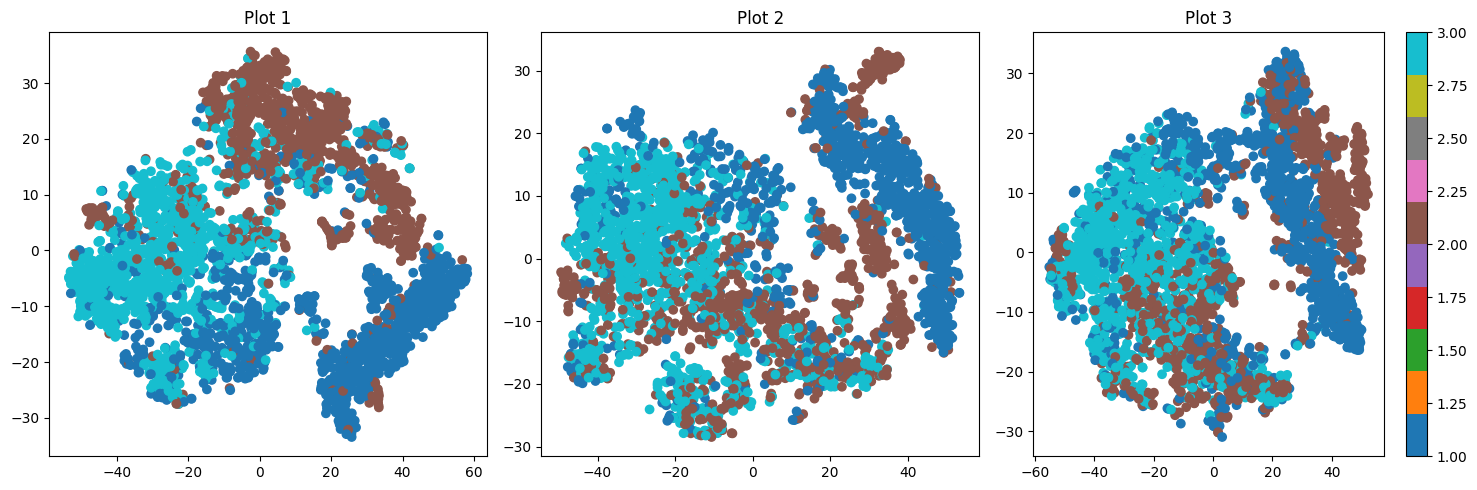

In [77]:
plt.figure(figsize=(15,5))

# Subplot 1
plt.subplot(1, 3, 1)
plt.scatter(reduced_feat[:, 0], reduced_feat[:, 1], c=x, cmap='tab10')
plt.title('Plot 1')

# Subplot 2
plt.subplot(1, 3, 2)
plt.scatter(reduced_feat2[:, 0], reduced_feat2[:, 1], c=x2, cmap='tab10')
plt.title('Plot 2')

# Subplot 3
plt.subplot(1, 3, 3)
plt.scatter(reduced_feat3[:, 0], reduced_feat3[:, 1], c=x3, cmap='tab10')
plt.title('Plot 3')
plt.colorbar()
plt.tight_layout()
plt.show()
